# 보스톤 집값 데이터셋을 이용한 다중선형회귀 모델 구축 및 평가

## 필요한 모듈


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

####  데이터 수집

In [2]:
#데이터셋을 로드
from sklearn.datasets import load_boston

boston = load_boston()

####  데이터 이해

In [ ]:
#데이터셋 정보확인

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

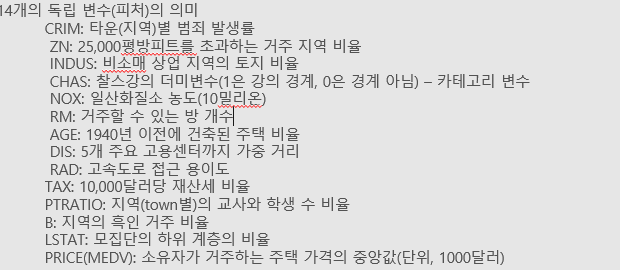

In [4]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [ ]:
# 독립변수(피처)와 종속변수를 DataFrame자료형으로 변환

In [9]:
# 데이터셋 객체의 data 배열, 즉, 독립변수 X가되는 피처(특성)들을 DataFrame자료형으로 변환하여
# boston_df생성
# boston_df.head() 데이터 5개 확인
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# 데이터셋 객체의 target배열(boston.target)을 종속 변수인 주택 가격("PRCIE") 컬럼으로 추가

In [10]:
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#데이터의 크기와 형태를 확인
boston_df.shape

(506, 14)

In [13]:
# 데이터프레임 정보
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### 데이터 이해:  데이터 선정 및 분포 정보 확인

In [ ]:
# CHAS : 찰스강변 데이터 - 연속형 값이 아닌 카테고리형 , 분석 대상에 제외한다.

In [16]:
boston_df.drop(['CHAS'], axis = 1, inplace = True)

In [17]:
boston_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    float64
 8   TAX      506 non-null    float64
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  PRICE    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
# 독립변수와  종속변수와의 관계에 대한 산점도 시각화

IndexError: index 3 is out of bounds for axis 0 with size 3

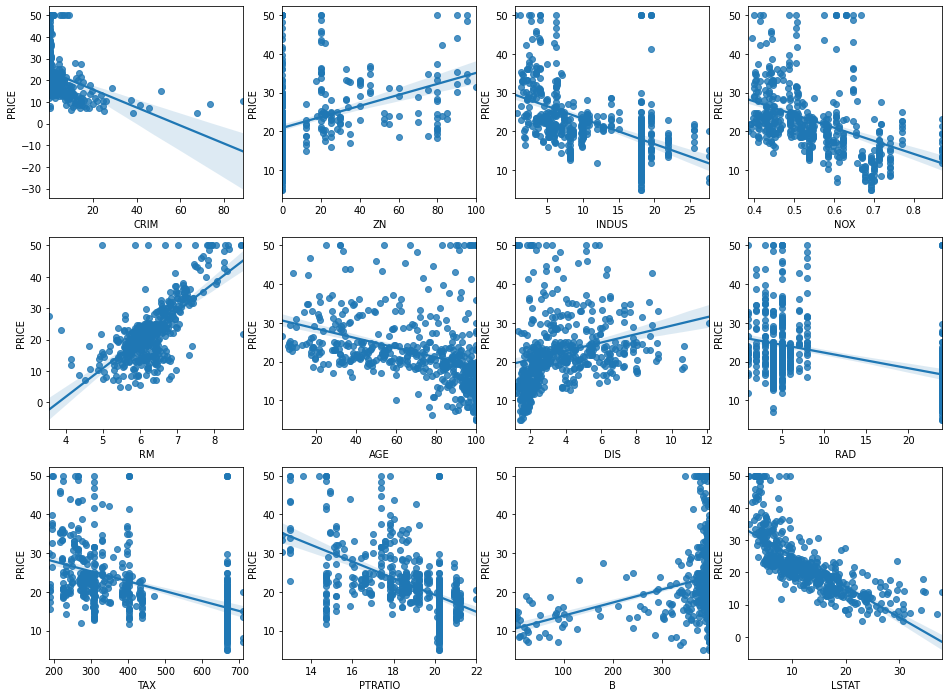

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize =(16, 12), nrows=3, ncols=4)

for i, feature in enumerate(list(boston_df.columns)):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y="PRICE", data=boston_df, ax = axs[row][col])
    

In [22]:
list(boston_df.columns)

['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'PRICE']

### 컬럼 별로 독립변수간의 상관관계 시각화(다중공선성이 의심되는 독립변수들)


In [ ]:
# 컬럼 별로 독립변수간의 상관관계 히트맵 시각화
# heatmap()

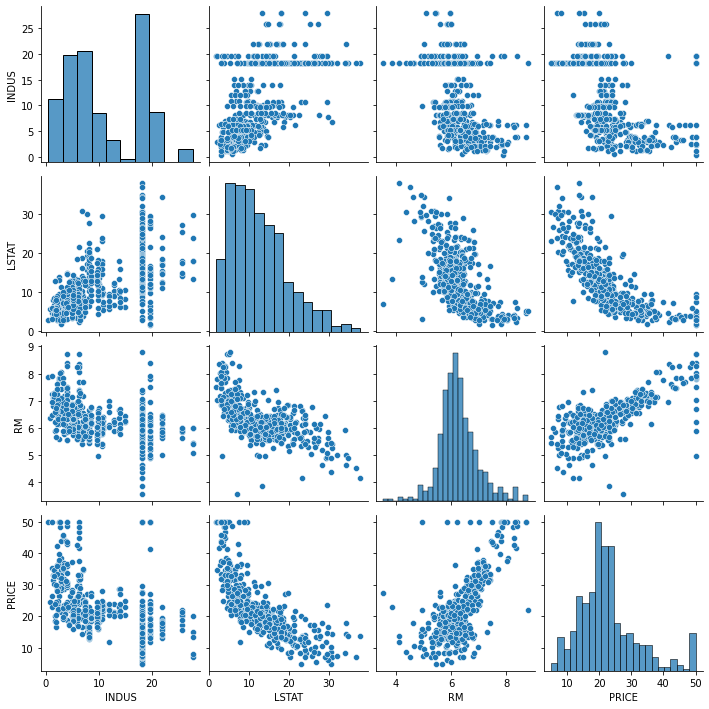

In [30]:
ccol = ['INDUS', 'LSTAT', 'RM', 'PRICE']

sns.pairplot(boston_df[ccol])





# 보스턴 집값 다중선형회귀 분석(사이킷런)

In [ ]:
# 데이터 준비, 탐색은 위에서 수행한 것으로 대체

In [33]:
from sklearn.model_selection import train_test_split

X = boston_df.drop(['PRICE'], axis = 1)
y = boston_df['PRICE']

# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=42)

### 데이터 준비

#### 데이터 분할

In [34]:
#X_train 데이터 일부 확인
X_train.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [45]:
X

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### 모델 클래스 선택

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

### 모델 구축 

In [36]:
#학습 수행
reg.fit(X_train, y_train)



LinearRegression()

### 모델 평가

In [43]:
#ndarray의 실수를 부동 소수점으로 출력
np.set_printoptions(suppress = True)

#회귀 계수와 절편 값 확인
print("Y 절편: {:.3f}".format(reg.intercept_))
print("회귀계수: ", np.round(reg.coef_, 3))

# ndarray의 실수 출력 옵션 복구
np.set_printoptions(suppress =False)

Y 절편: 31.428
회귀계수:  [ -0.142   0.038   0.073 -14.901   4.146  -0.009  -1.418   0.277  -0.01
  -0.937   0.013  -0.566]


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:.3f}".format(r2))

MSE: 21.697, RMSE: 4.658
R2: 0.709


In [50]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기
n = len(X_train)

#독립변수의 갯수
k = len(X_train.columns)

# 수정된 결정 계수
adj_r2 = 1 - ((1-r2) * (n - 1) / (n - k - 1))

print("Adjusted R2: {:.4f} ".format(adj_r2))

Adjusted R2: 0.6986 


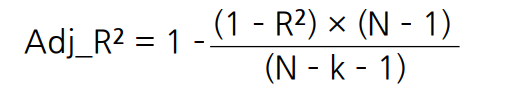

#### 회귀 계수 확인 : 각각의 독립 변수의 설명력 확인

In [51]:
#회귀  모델에서 구한 회귀 계수와 피처 이름을 묶어 
#시리즈 자료형으로 만듬
coef = pd.Series(data = np.round(reg.coef_, 3),
                     index = X.columns)

print('y = ' + str(reg.intercept_) + ' + ')

for i, c in zip(coef.index, coef.values):
    print('(' + str(c) + ')* ' + str(i) )

y = 31.4284794823025 + 
(-0.142)* CRIM
(0.038)* ZN
(0.073)* INDUS
(-14.901)* NOX
(4.146)* RM
(-0.009)* AGE
(-1.418)* DIS
(0.277)* RAD
(-0.01)* TAX
(-0.937)* PTRATIO
(0.013)* B
(-0.566)* LSTAT


In [52]:
coef

CRIM       -0.142
ZN          0.038
INDUS       0.073
NOX       -14.901
RM          4.146
AGE        -0.009
DIS        -1.418
RAD         0.277
TAX        -0.010
PTRATIO    -0.937
B           0.013
LSTAT      -0.566
dtype: float64

###  실제값과 예측값의 분포차이를 시각화

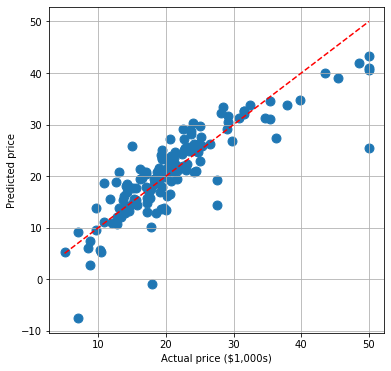

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=80)
plt.plot([5, 50], [5, 50], c='r', ls='--')
plt.xlabel("Actual price ($1,000s)")
plt.ylabel("Predicted price")
plt.grid()
plt.show()

# 보스턴 집값: 다중선형회귀 분석(스탯츠모델)

In [54]:
# 최소 제곱법으로 객체 생성, 학습, 예측, 평가를 진행한다.

import statsmodels.api as sm

# 훈련 데이터로 학습 수행
X_train = sm.add_constant(X_train)
reg = sm.OLS(y_train, X_train).fit()

# 검증 데이터로 예측 수행
X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

#평가 지표 값 확인
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     79.49
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           4.52e-91
Time:                        02:57:29   Log-Likelihood:                -1058.4
No. Observations:                 354   AIC:                             2143.
Df Residuals:                     341   BIC:                             2193.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.4285      6.126      5.130      0.0

# [응용1]: 다중 선형회귀 연습- load_diabetes

### 필요한 모듈 import

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 데이터 수집

In [56]:
from sklearn.datasets import load_diabetes

diab = load_diabetes()

In [ ]:
### 데이터 이해

In [57]:
dir(diab)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [58]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [63]:
diab.data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [64]:
diab.target[:5]

array([151.,  75., 141., 206., 135.])

### 데이터 준비

In [67]:
# X(독립변수), Y(종속변수) 분할
from sklearn.model_selection import train_test_split

X = diab.data
y = diab.target

# 학습용 데이터와 평가용 데이터로 분할하기
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=2)

In [76]:
type(coef)

pandas.core.series.Series

In [79]:
### 모델 구축
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
 
# 회귀 모델 객체 생성
reg = LinearRegression()

#학습 수행
reg.fit(X_train, y_train)
#회귀 계수 확인, 회귀식 확인
coef = pd.Series(data = reg.coef_, index = diab.feature_names)

print("y절편: ", reg.intercept_)
print("회귀 계수\n", coef)

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기
y_pred = reg.predict(X_test)

### 모델 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:.3f}".format(r2))


n = len(X_train)
k = len(diab.feature_names)
aadj_r2 = 1 - ((1-r2) * (n - 1) / (n - k - 1))
print("Adjusted R2: {:.4f} ".format(adj_r2))

y절편:  152.62754194200335
회귀 계수
 age    -31.805370
sex   -214.671676
bmi    445.137506
bp     376.354944
s1    -802.451729
s2     525.951855
s3     106.399671
s4     172.311225
s5     799.479042
s6      57.167687
dtype: float64
MSE: 2919.751, RMSE: 54.035
R2: 0.501
Adjusted R2: 0.6986 


# [응용2] 캘리포니아 주택 가격

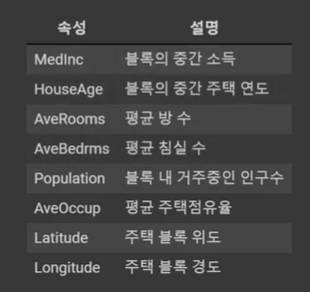

### 데이터 수집 및 탐색

In [86]:
dir(california)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [87]:
#fetch data이므로 온라인으로만 fetch가능
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
print(california.keys()) 
print(california.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block gro

In [23]:
# 샘플:20640

In [24]:
#속성 :8개

# 시각화로 탐색

In [88]:
# 온라인 아닌경우 :  pd.read_csv('./data/california_dataset.csv')
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Price'] = california.target
california_df.head()

california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


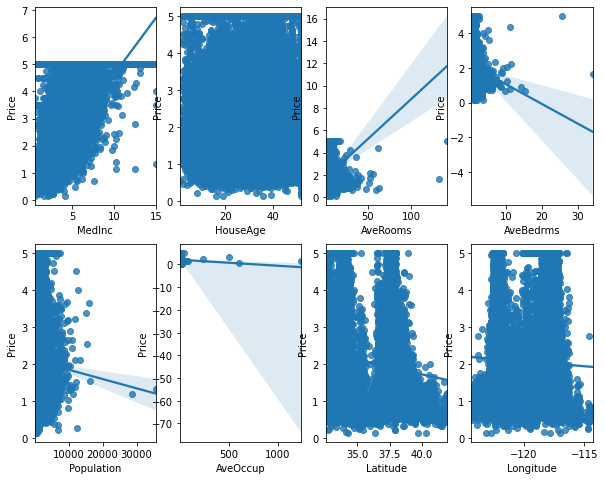

In [26]:
# 종속(price)변수 VS 독립변수(8개)  관계 시각화 탐색


In [27]:
# 독립변수 간 상관관계 확인

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


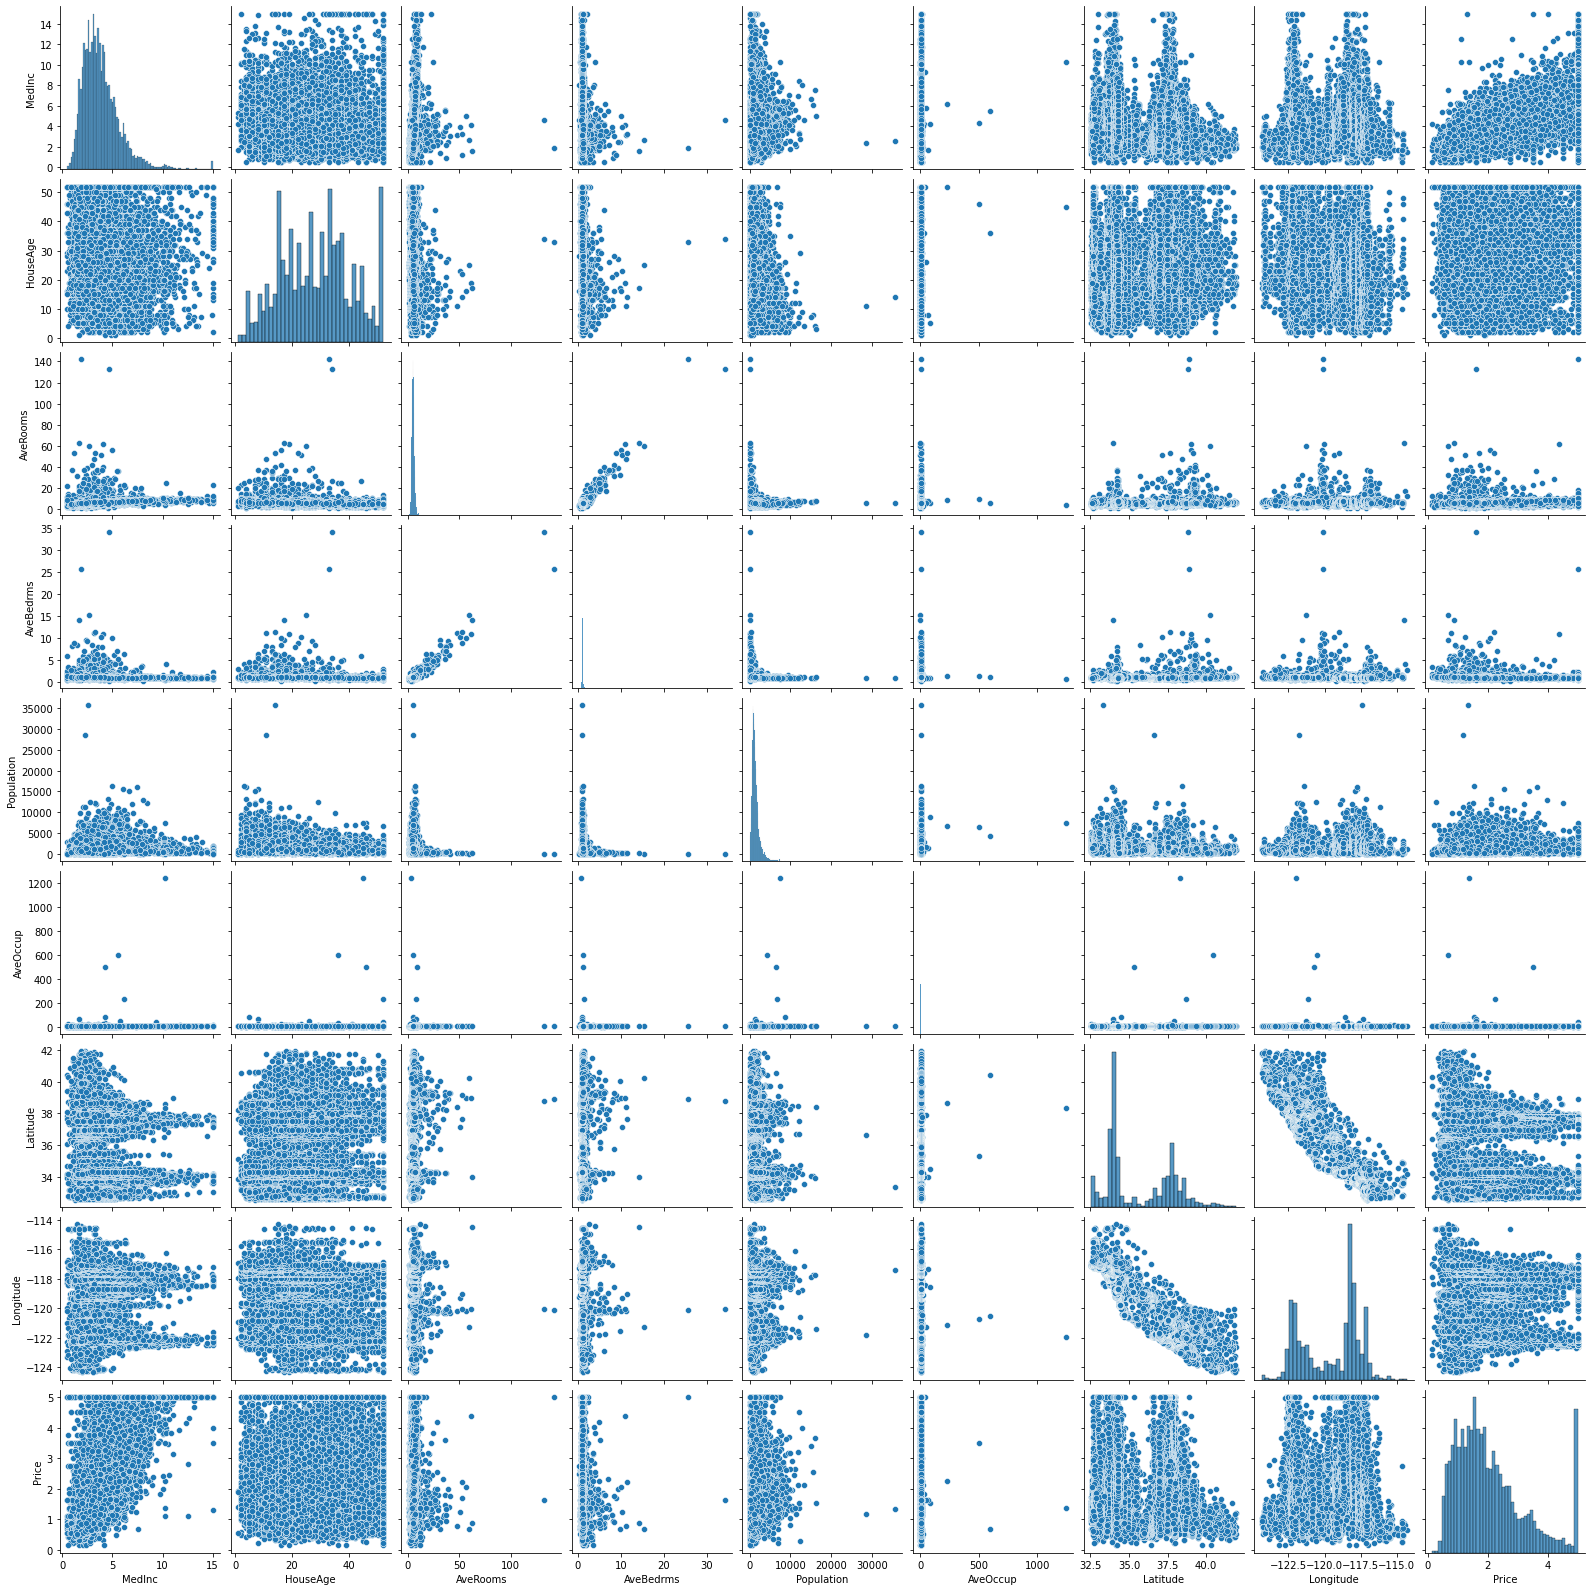

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 컬럼에서 상호간의 관계를 파악할 변수들을 선정한다
ccol = list(california_df.columns)

#pairplot 시각화

sns.pairplot(california_df[ccol])

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

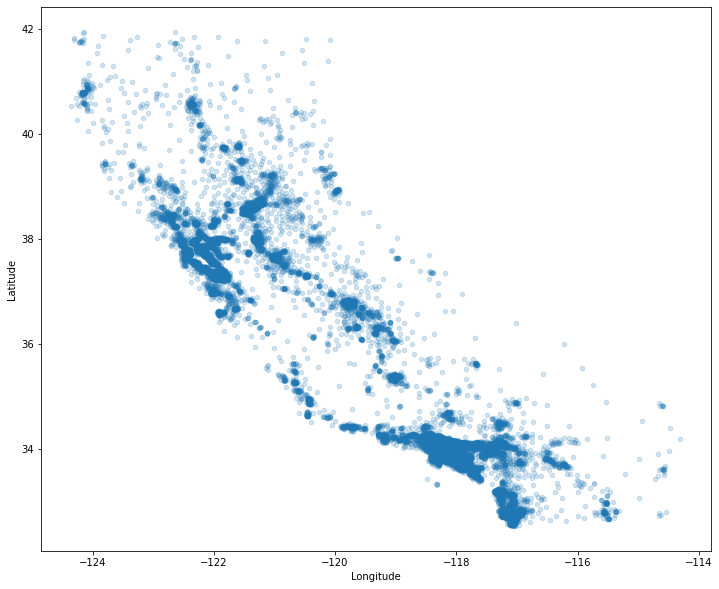

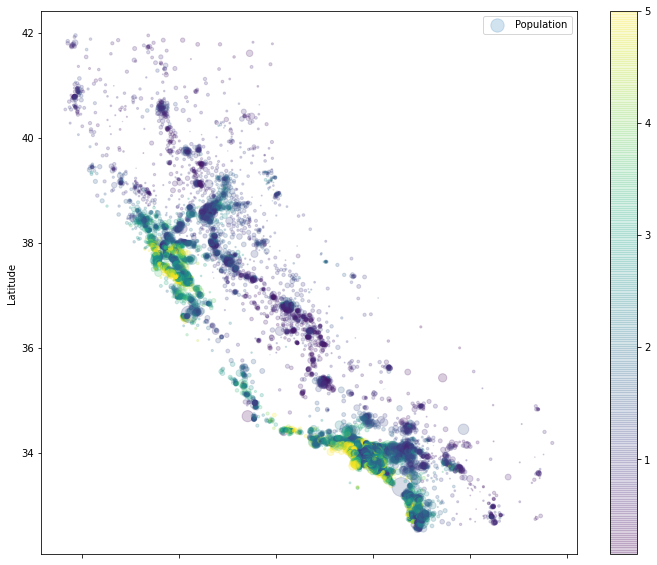

In [90]:
# 위경도 데이터 시각화
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, figsize=(12, 10));

california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, s=california_df['Population']/100, \
                   figsize=(12, 10), label='Population', c=california_df['Price'], cmap=plt.get_cmap('viridis'),\
                  colorbar=True);

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     Price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

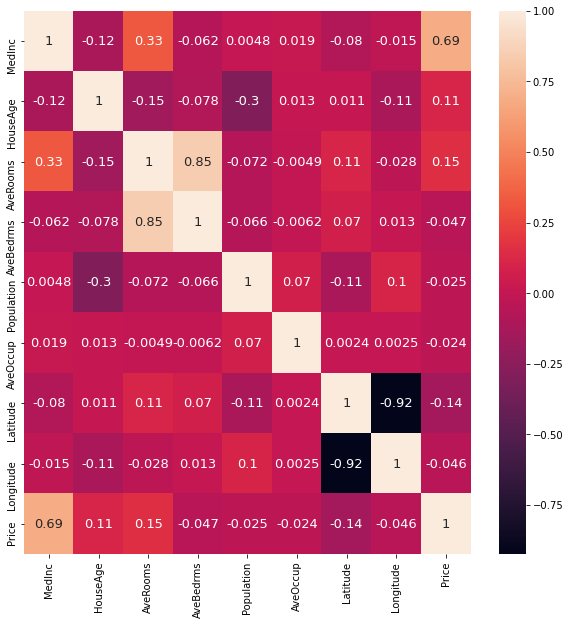

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

#상관 계수 값에 대한 히트맵


In [35]:
# 선형회귀

# 회귀식으로 표현

# 결과 시각화 ( actual price VS predicted price)

Score: 0.6314085220192572
y = -36.90984316467035 
0.4308326968560208* x0
0.00963531754511315* x1
-0.10092932263369295* x2
0.6003443724471089* x3
-4.401042015715751e-06* x4
-0.004648388626165133* x5
-0.4240711038346886* x6
-0.4353688584776837* x7


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# 평가(검증) 데이터로 예측 수행 -> 예측 결과 y_pred구하기


# 평가 지표 계산

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("R2: {:3f}".format(r2))

MSE: 0.483, RMSE: 0.695
R2: 0.631409


In [37]:
# 수정된 결정 계수 확인(Ajusted-R2)

#데이터의 크기


#독립변수의 갯수


# 수정된 결정 계수

print("Adjusted R2: {:.4f} ".format(adj_r2))

Adjusted R2: 0.6312 
